<div class="alert alert-block alert-success">
    
## Data Science Libraries Quiz

### Instructions


1. Write code which will produce the specified result  
2. Enter that result in the green response cell when prompted
3. Write code comment(s) to describe the code


#### Note:

1. Complete the work without the help of others
2. Enter one code 
comment on Question 0 for 1 point 
3. There are 9 questions, each worth 11 points
    - 10 points for code and answers
    - 1 point for at least one code comment on each question
4. You can receive partial credit for your code





<div class="alert alert-block alert-info">

### Question 0 

- Run the following two cells
- Enter one code comment

In [15]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = data('tips')

In [5]:
df.shape

(244, 7)

In [6]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


---

<div class="alert alert-block alert-info">
  
## Question 1
        
a) What is the highest total_bill?
    
b) What time of day did this total_bill occur? 

In [12]:
# a. highest_bill code uses dataframe to extract the "max" amount from the total_bill column. 
highest_bill = df['total_bill'].max()
highest_bill


50.81

In [25]:
# b.1. sort values by total_bill and descending order with the head(1) which is the highest bill will give index that shows time of day)
print((df.sort_values('total_bill', ascending=False)).head(1))

     total_bill   tip   sex smoker  day    time  size
171       50.81  10.0  Male    Yes  Sat  Dinner     3


In [66]:
#b.2. isolates the value of the "day" column
print(df.sort_values('total_bill', ascending=False).head(1)['time'].values[0])

Dinner


<div class="alert alert-block alert-success">

### Question 1 Response
#### What is the highest total_bill?
##### The value from the highest_bill code correlates to the .describe() that returns a description of the data in the DataFrame which also shows 50.81 as the max amount for the 'total_bill column'
    
a) 50.81
#### What is the highest total_bill?   
b) Dinner


---

<div class="alert alert-block alert-info">
  
## Question 2
    
a) What unique values are in the smoker column?
    
b) Are the majority of tables smoking or non-smoking?

In [24]:
#a. used unique() method to apply to the dataframe
unique_values = df['smoker'].unique()
unique_values

array(['No', 'Yes'], dtype=object)

In [29]:
#b.1 applied boolean to create new column "smoking_tables"
df['smoking_tables'] = df['smoker'] == 'Yes'
print(df)

     total_bill   tip     sex smoker   day    time  size  smoking tables
1         16.99  1.01  Female     No   Sun  Dinner     2           False
2         10.34  1.66    Male     No   Sun  Dinner     3           False
3         21.01  3.50    Male     No   Sun  Dinner     3           False
4         23.68  3.31    Male     No   Sun  Dinner     2           False
5         24.59  3.61  Female     No   Sun  Dinner     4           False
..          ...   ...     ...    ...   ...     ...   ...             ...
240       29.03  5.92    Male     No   Sat  Dinner     3           False
241       27.18  2.00  Female    Yes   Sat  Dinner     2            True
242       22.67  2.00    Male    Yes   Sat  Dinner     2            True
243       17.82  1.75    Male     No   Sat  Dinner     2           False
244       18.78  3.00  Female     No  Thur  Dinner     2           False

[244 rows x 8 columns]


In [42]:
#b.2 imported numpy to use np.where to change values and make it easier for audience to clearly understand the data.
import numpy as np

df['smoking_tables'] = np.where(df['smoker'] == 'Yes', 'smoking', 'non-smoking')
df.value_counts('smoking_tables')



smoking_tables
non-smoking    151
smoking         93
dtype: int64

<div class="alert alert-block alert-success">

### Question 2 Response
 #### What unique values are in the smoker column?   
a) array(['No', 'Yes'], dtype=object)
 #### Are the majority of tables smoking or non-smoking?
b) The majority of the tables are non-smoking:
    
    smoking_tables
    non-smoking    151
    smoking         93
    dtype: int64

---

<div class="alert alert-block alert-info">
  
## Question 3 
    
- What proportion of the bills are from the weekend (Saturday and/or Sunday)? 
    - Assume each table has one bill, regardless of table size
- Round your answer to two decimal points.

In [43]:
#3.a. Get more info on the unique values for the 'day' column
unique_values = df['day'].unique()
unique_values

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [51]:
#3.b add new column that specifies weekends from weekday bills and count of which is more
df['weekend_bills'] = (df['day'] == 'Sat') | (df['day'] == 'Sun')
df['weekend_bills'] = np.where(df['weekend_bills'], 'weekend', 'weekday')
print(df['weekend_bills'].value_counts())

weekend    163
weekday     81
Name: weekend_bills, dtype: int64


In [54]:
#3.c determine the proportion of bills that are weekend
weekend_proportion = (df['weekend_bills'].value_counts(normalize=True)['weekend'])
print(weekend_proportion)

0.6680327868852459


In [55]:
#3.d round to two decimal points
weekend_proportion = round(df['weekend_bills'].value_counts(normalize=True)['weekend'], 2)
print(weekend_proportion)

0.67


<div class="alert alert-block alert-success">

### Question 3 Response
    
#### What proportion of the bills are from the weekend (Saturday and/or Sunday)?
The proportion of the bills that are from the weekend are 0.67 or 67% of the bills


---
<div class="alert alert-block alert-info">
    
## Question 4

    
-  Create a column named `percent_tip`.


- Calculate the percent_tip based on the formula below. 



> $\texttt{Percent tip} = \dfrac{\texttt{tip amount}}{\texttt{bill}}$

- What was the highest percent tip?

In [59]:
#4.a created column named 'percent_tip' and used the formula provided. Checked the data using .head()method
df['percent_tip'] = (df['tip']) / (df['total_bill'])
df.head(5)

,total_bill,tip,sex,smoker,day,time,size,smoking_tables,weekend_bills,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,non-smoking,weekend,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,non-smoking,weekend,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,non-smoking,weekend,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,non-smoking,weekend,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,non-smoking,weekend,0.146808


In [64]:
#4.b gets the whole row that has the highest 'percent_tip'. Extra step, but useful to double check information
print(df.sort_values('percent_tip', ascending=False).head(1))

     total_bill   tip   sex smoker  day    time  size smoking_tables  \
173        7.25  5.15  Male    Yes  Sun  Dinner     2        smoking   

    weekend_bills  percent_tip  
173       weekend     0.710345  


In [65]:
#4.c isolated the highest tip percent value 
print(df.sort_values('percent_tip', ascending=False).head(1)['percent_tip'].values[0])

0.710344827586207


<div class="alert alert-block alert-success">

### Question 4 Response
    
##### The highest percent tip was  
    0.710344827586207
    

---

<div class="alert alert-block alert-info">
    
## Question 5

    
a) Which time of day has a higher average total_bill, dinner or lunch?
    
b) What is the difference in the average bill between dinner and lunch?


In [78]:
#5.a.1 determine the average total bill overall. Correlates to the .describe() method mean
average_total_bill = df['total_bill'].mean()
average_total_bill

19.78594262295082

In [89]:
df.describe()

,total_bill,tip,size,percent_tip
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [92]:
#5.a.2 use groupyby time to separate Dinner and Lunch data and isolate the mean for total_bill
df.groupby('time')['total_bill'].agg(['min', 'mean', 'max'])


,min,mean,max
time,,,
Dinner,3.07,20.797159,50.81
Lunch,7.51,17.168676,43.11


In [93]:
#5.b finding the difrence betwen the means 
time_avgs = df.groupby('time')['total_bill'].mean()
average_bill_difference = time_avgs['Dinner'] - time_avgs['Lunch']
print(average_bill_difference)

3.628482620320856


<div class="alert alert-block alert-success">

### Question 5 Response
    
a) The dinner time has a higher average total_bill 20.797159 which is above the overall total bill average 19.785943

b) 3.628482620320856

---
<div class="alert alert-block alert-info">
    
## Question 6
    

- Rename the column named `size` to `table_size`
- Verify this column name replaces the former column name 
- Use your new column name to determine:
    - What is the most common table size?


In [95]:
#6.a rename column
df = df.rename(columns={'size':'table_size'})
print(df)

     total_bill   tip     sex smoker   day    time  table_size smoking_tables  \
1         16.99  1.01  Female     No   Sun  Dinner           2    non-smoking   
2         10.34  1.66    Male     No   Sun  Dinner           3    non-smoking   
3         21.01  3.50    Male     No   Sun  Dinner           3    non-smoking   
4         23.68  3.31    Male     No   Sun  Dinner           2    non-smoking   
5         24.59  3.61  Female     No   Sun  Dinner           4    non-smoking   
..          ...   ...     ...    ...   ...     ...         ...            ...   
240       29.03  5.92    Male     No   Sat  Dinner           3    non-smoking   
241       27.18  2.00  Female    Yes   Sat  Dinner           2        smoking   
242       22.67  2.00    Male    Yes   Sat  Dinner           2        smoking   
243       17.82  1.75    Male     No   Sat  Dinner           2    non-smoking   
244       18.78  3.00  Female     No  Thur  Dinner           2    non-smoking   

    weekend_bills  percent_

In [97]:
#6.b found values
df['table_size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: table_size, dtype: int64

In [98]:
#6.c isolated value
df['table_size'].value_counts().head(1)

2    156
Name: table_size, dtype: int64

<div class="alert alert-block alert-success">

### Question 6 Response
    
-  2    156
Name: table_size, dtype: int64
    
    Table size of 2 is the most common
    

---
<div class="alert alert-block alert-info">
    
## Question 7

- The following code produces errors.
    
#### Incorrect code
```python
df.total_bill( (df.day == 'Thursday') and (df.time == 'dinner') ) 
```
    
- Correct the code and use it to determine:
    - What is the **maximum total_bill** for dinner time on Thursday?
    

In [144]:
#7.a corrected code to show 
Thursday_high_bill = df['total_bill'] = (df['day'] == 'Thursday') & (df['time'] == 'Dinner')
Thursday_high_bill.head(5)

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [145]:
#7.b Checking values from bottom to see if any are true 
Thursday_high_bill.tail(5)

240    False
241    False
242    False
243    False
244    False
dtype: bool

In [146]:
#7.c no values for dinner time on Thursday
Thursday_high_bill.describe()

count       244
unique        1
top       False
freq        244
dtype: object

<div class="alert alert-block alert-success">

### Question 7 Response

    
-There are no values for Thursday at dinner time 
    
    

---
<div class="alert alert-block alert-info">
    
## Question 8


- What is the min, mean, and max total_bill?
- Use a **histogram** to plot the distribution of the total_bill
    - add a title to the plot
    

In [112]:
#8.a defines totalbill 
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<Axes: xlabel='day', ylabel='total_bill'>

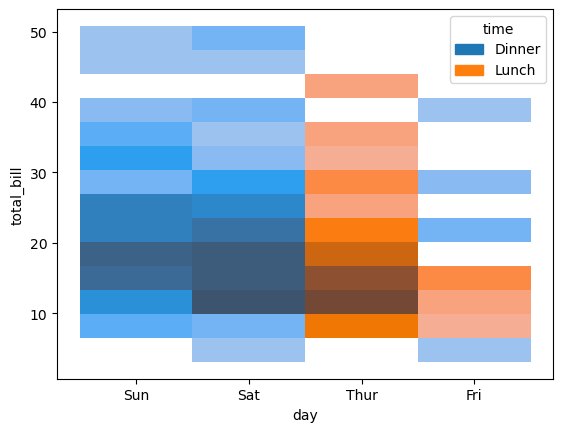

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

#8.b imported seaborn and plotted histogram using the following and pink 
sns.histplot(x='day', y='total_bill', hue='time', data=df, color='pink')

<div class="alert alert-block alert-success">

### Question 8 Response

    
-  sns.histplot(x='day', y='total_bill', hue='time', data=df, color='pink')
    

---
<div class="alert alert-block alert-info">
    
## Question 9

- Use matplotlib to create a **scatter plot** of total_bill and tips
    - Plot total_bill along the x-axis

- Customize the visualization in at least one way
- Add axis labels and a title

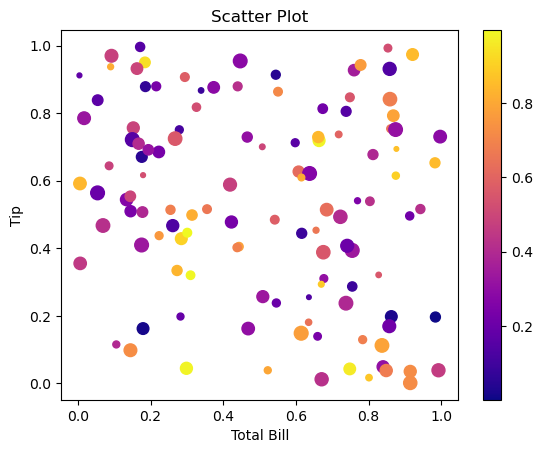

In [125]:
#8.
import numpy as np
import matplotlib.pyplot as plt



x = np.arange(-20, 100)
y = np.sin(x)

a = np.random.rand(len(x))
b = np.random.rand(len(x))
size = np.random.randint(10, 100, len(x))
clr = np.random.rand(len(x))

# Create the scatter plot
plt.scatter(a, b, s=size, c=clr, cmap='plasma')

#added colorbar because it looks cool
plt.colorbar()

# Set x and y labels
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot')

# Show the plot
plt.show()